## 垃圾邮件分类

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('SMSSpamCollection', delimiter='\t', header=None)
print(df.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [6]:
print('Number of spam messages: %s' % df[df[0] == 'spam'].shape[0])
print('Number of ham messages: %s' % df[df[0] == 'ham'][0].count())

Number of spam messages: 747
Number of ham messages: 4825


In [7]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
X = df[1].values
y = df[0].values
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
for i, p in enumerate(predictions[:5]):
    print('Predicted: %s, message: %s' % (p, X_test_raw[i]))

Predicted: ham, message: Have a great trip to India. And bring the light to everyone not just with the project but with everyone that is lucky to see you smile. Bye. Abiola
Predicted: ham, message: Sitting in mu waiting for everyone to get out of my suite so I can take a shower
Predicted: ham, message: You'd like that wouldn't you? Jerk!
Predicted: spam, message: Update_Now - Xmas Offer! Latest Motorola, SonyEricsson & Nokia & FREE Bluetooth! Double Mins & 1000 Txt on Orange. Call MobileUpd8 on 08000839402 or call2optout/F4Q=
Predicted: ham, message: Thx. All will be well in a few months


F:\LOVE_SPACE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 混淆矩阵

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [10]:
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

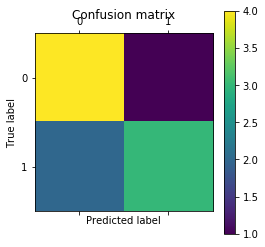

In [11]:
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [12]:
from sklearn.metrics import roc_curve, auc

In [13]:
df = pd.read_csv('sms.csv')

In [14]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'], random_state=11)

In [15]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
clf = LogisticRegression()
clf.fit(X_train, y_train)
scores = cross_val_score(classifier, X_train, y_train, cv=5)

F:\LOVE_SPACE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\LOVE_SPACE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
print('Accuracies: %s' % scores)
print('Mean accuracy: %s' % np.mean(scores))

Accuracies: [0.95221027 0.95454545 0.96172249 0.96052632 0.95209581]
Mean accuracy: 0.9562200683094717


[[0.98498542 0.01501458]
 [0.96847725 0.03152275]
 [0.44846639 0.55153361]
 ...
 [0.87424752 0.12575248]
 [0.98856751 0.01143249]
 [0.94371922 0.05628078]]


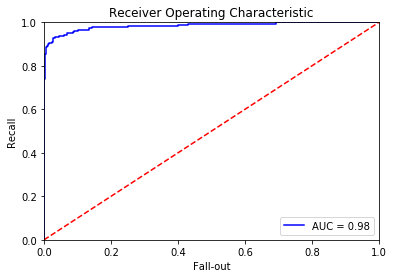

In [19]:
predictions = clf.predict_proba(X_test)
print(predictions)
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()